In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('Filled Data.csv')
df.head()

,Unnamed: 0,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,0,54.8,2000.0,316.0496,0.098245,0.011050,0.01,62.0,21.7,24.0,...,-6116.469944,5.324302,2.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,55.3,2001.0,307.2416,0.095925,0.010625,0.01,63.0,21.8,35.0,...,-5490.544839,5.353053,2.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,56.2,2002.0,292.3430,0.093330,0.010130,0.01,64.0,21.9,36.0,...,870.000000,9.443390,2.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,56.7,2003.0,286.4569,0.090470,0.009655,0.01,65.0,22.0,41.0,...,920.000000,8.941260,2.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,57.0,2004.0,281.8943,0.087595,0.009210,0.02,67.0,22.1,5.0,...,920.000000,9.808470,2.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [3]:
print("Total null values excluding inexplicit nulls")
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

Total null values excluding inexplicit nulls


,Total Null Val,Null Value %


In [4]:
df1 = df.copy()
df1.columns

Index(['Unnamed: 0', 'life_expectancy', 'year', 'adult_mortality',
       'infant_mortality', '1-4_mortality', 'alcohol', 'hep_b', 'bmi', 'polio',
       'health_gov_expendt%', 'dtp3', 'hiv_aids', 'gdp', '5_19thinness',
       '5_19obesity', 'hdi', 'schooling', 'drinking_water',
       'national_income_capita', 'health_expenditure%_gdp', 'obesity_adlts',
       'region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing'],
      dtype='object')

In [5]:
df1 = df1.drop(['Unnamed: 0', 'region_Europe & Central Asia', 'region_Latin America & Caribbean', 'region_Middle East & North Africa', 'region_North America', 'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing'], axis = 1)

MinMaxScaler

In [6]:
variables = df1.columns

In [7]:
mm_scaler = preprocessing.MinMaxScaler()
df1_mm = mm_scaler.fit_transform(df1)
df1_mm = pd.DataFrame(df1_mm, columns=variables)
df1_mm.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,0.316,0.000000,0.411642,0.617590,0.319062,0.104412,0.616332,0.154472,0.218750,0.454440,...,0.0,0.065003,0.732143,0.126435,0.317813,0.265700,0.103502,0.057722,0.221740,0.093288
1,0.326,0.066667,0.398034,0.604202,0.308743,0.104412,0.626436,0.162602,0.333333,0.431225,...,0.0,0.065026,0.725000,0.129915,0.319694,0.285024,0.103791,0.062259,0.223222,0.095294
2,0.344,0.133333,0.375016,0.589228,0.296724,0.104412,0.636540,0.170732,0.343750,0.428903,...,0.0,0.065579,0.717857,0.133396,0.320634,0.299517,0.127777,0.108371,0.434192,0.099306
3,0.354,0.200000,0.365922,0.572724,0.285191,0.104412,0.646644,0.178862,0.395833,0.490424,...,0.0,0.065664,0.710714,0.136876,0.350723,0.314010,0.151773,0.108733,0.408294,0.101312
4,0.360,0.266667,0.358873,0.556134,0.274386,0.104914,0.666851,0.186992,0.020833,0.488683,...,0.0,0.065824,0.703571,0.140356,0.358245,0.328502,0.175961,0.108733,0.453022,0.105324


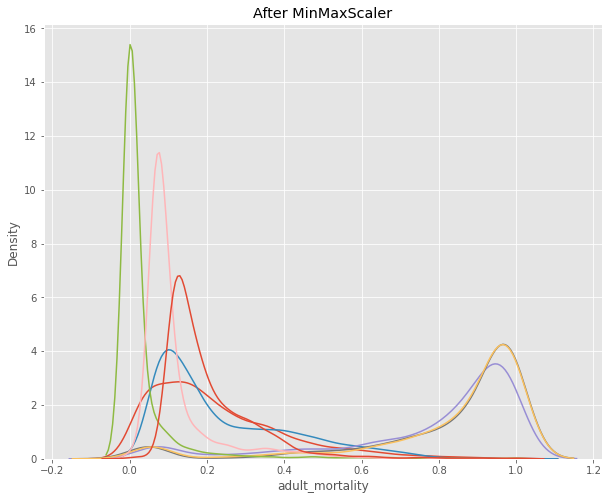

In [9]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df1_mm['adult_mortality'], ax=ax1)
sns.kdeplot(df1_mm['infant_mortality'], ax=ax1)
sns.kdeplot(df1_mm['hep_b'], ax=ax1)
sns.kdeplot(df1_mm['polio'], ax=ax1)
sns.kdeplot(df1_mm['dtp3'], ax=ax1);
sns.kdeplot(df1_mm['hiv_aids'], ax=ax1);
sns.kdeplot(df1_mm['gdp'], ax=ax1);
sns.kdeplot(df1_mm['national_income_capita'], ax=ax1);

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

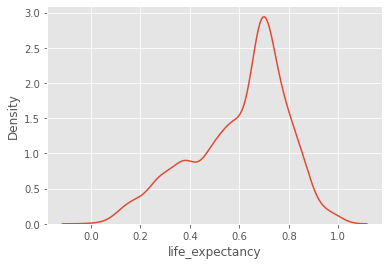

In [10]:
sns.kdeplot(df1_mm['life_expectancy'])

Robust Scaler

In [11]:
r_scaler = preprocessing.RobustScaler()
df1_r = r_scaler.fit_transform(df1)
df1_r = pd.DataFrame(df1_r, columns=variables)
df1_r.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,-1.373016,-1.000000,1.036824,1.784105,2.150783,-0.560091,-1.077919,-1.18750,-3.584416,0.779634,...,0.0,-0.272927,2.709677,-0.656716,-1.151361,-1.604651,-2.363479,-0.830759,-0.114461,-0.942177
1,-1.333333,-0.866667,0.975893,1.730891,2.060526,-0.560091,-1.037919,-1.15625,-3.012987,0.652347,...,0.0,-0.272441,2.677419,-0.641791,-1.144558,-1.511628,-2.362540,-0.795159,-0.106265,-0.935374
2,-1.261905,-0.733333,0.872830,1.671369,1.955402,-0.560091,-0.997919,-1.12500,-2.961039,0.639618,...,0.0,-0.260794,2.645161,-0.626866,-1.141156,-1.441860,-2.284644,-0.433396,1.059771,-0.921769
3,-1.222222,-0.600000,0.832112,1.605769,1.854526,-0.560091,-0.957919,-1.09375,-2.701299,0.976929,...,0.0,-0.258992,2.612903,-0.611940,-1.032313,-1.372093,-2.206718,-0.430552,0.916629,-0.914966
4,-1.198413,-0.466667,0.800549,1.539825,1.760021,-0.558579,-0.877919,-1.06250,-4.571429,0.967383,...,0.0,-0.255613,2.580645,-0.597015,-1.005102,-1.302326,-2.128168,-0.430552,1.163845,-0.901361


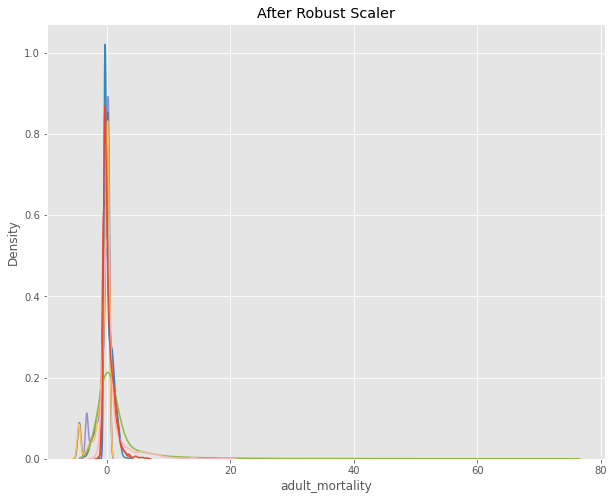

In [13]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Robust Scaler')

sns.kdeplot(df1_r['adult_mortality'], ax=ax1)
sns.kdeplot(df1_r['infant_mortality'], ax=ax1)
sns.kdeplot(df1_r['hep_b'], ax=ax1)
sns.kdeplot(df1_r['polio'], ax=ax1)
sns.kdeplot(df1_r['dtp3'], ax=ax1);
sns.kdeplot(df1_r['hiv_aids'], ax=ax1);
sns.kdeplot(df1_r['gdp'], ax=ax1);
sns.kdeplot(df1_r['national_income_capita'], ax=ax1);

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

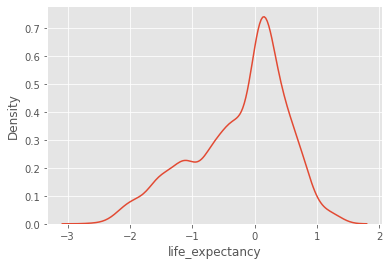

In [14]:
sns.kdeplot(df1_r['life_expectancy'])

Standard Scaler

In [15]:
s_scaler = preprocessing.StandardScaler()
df1_s = s_scaler.fit_transform(df1)
df1_s = pd.DataFrame(df1_s, columns=variables)
df1_s.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,-1.518840,-1.626978,1.056456,2.134249,1.432765,-1.135824,-0.631962,-1.479102,-2.496114,0.932446,...,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-0.296260,-1.429186
1,-1.466227,-1.410048,0.979460,2.058413,1.351418,-1.135824,-0.592678,-1.433788,-2.026371,0.767934,...,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-0.284611,-1.418063
2,-1.371524,-1.193118,0.849222,1.973589,1.256673,-1.135824,-0.553394,-1.388474,-1.983667,0.751483,...,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,1.372584,-1.395818
3,-1.318912,-0.976187,0.797768,1.880102,1.165757,-1.135824,-0.514110,-1.343160,-1.770148,1.187438,...,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,1.169146,-1.384695
4,-1.287344,-0.759257,0.757883,1.786125,1.080582,-1.133325,-0.435542,-1.297846,-3.307488,1.175100,...,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,1.520495,-1.362450


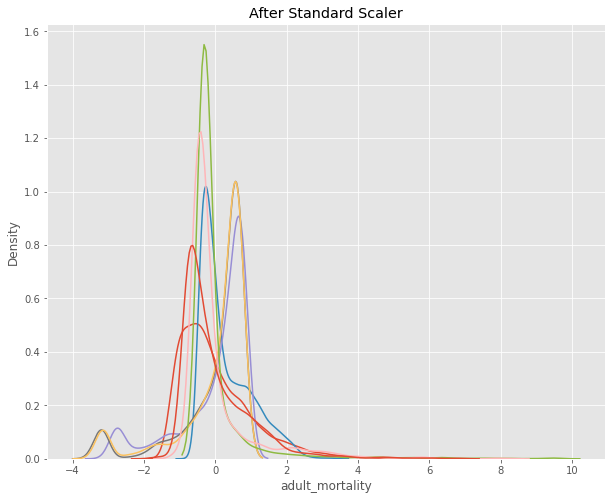

In [18]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Standard Scaler')

sns.kdeplot(df1_s['adult_mortality'], ax=ax1)
sns.kdeplot(df1_r['infant_mortality'], ax=ax1)
sns.kdeplot(df1_s['hep_b'], ax=ax1)
sns.kdeplot(df1_s['polio'], ax=ax1)
sns.kdeplot(df1_s['dtp3'], ax=ax1);
sns.kdeplot(df1_s['hiv_aids'], ax=ax1);
sns.kdeplot(df1_s['gdp'], ax=ax1);
sns.kdeplot(df1_s['national_income_capita'], ax=ax1);

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

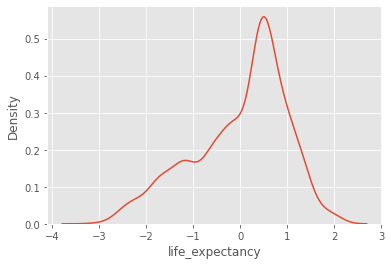

In [19]:
sns.kdeplot(df1_s['life_expectancy'])

In [20]:
df1_s.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,-1.518840,-1.626978,1.056456,2.134249,1.432765,-1.135824,-0.631962,-1.479102,-2.496114,0.932446,...,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-0.296260,-1.429186
1,-1.466227,-1.410048,0.979460,2.058413,1.351418,-1.135824,-0.592678,-1.433788,-2.026371,0.767934,...,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-0.284611,-1.418063
2,-1.371524,-1.193118,0.849222,1.973589,1.256673,-1.135824,-0.553394,-1.388474,-1.983667,0.751483,...,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,1.372584,-1.395818
3,-1.318912,-0.976187,0.797768,1.880102,1.165757,-1.135824,-0.514110,-1.343160,-1.770148,1.187438,...,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,1.169146,-1.384695
4,-1.287344,-0.759257,0.757883,1.786125,1.080582,-1.133325,-0.435542,-1.297846,-3.307488,1.175100,...,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,1.520495,-1.362450


In [21]:
df1_s['year'].value_counts()

-0.542326    183
 0.759257    183
-1.410048    183
-1.193118    183
 0.325396    183
 0.542326    183
-1.626978    183
 0.976187    183
-0.325396    183
-0.759257    183
 1.193118    183
-0.976187    183
-0.108465    183
 1.626978    183
 1.410048    183
 0.108465    183
Name: year, dtype: int64

In [22]:
scaled_data = df[['region_Europe & Central Asia', 'region_Latin America & Caribbean', 'region_Middle East & North Africa', 'region_North America', 'region_South Asia', 'region_Sub-Saharan Africa', 'status_Developing']]
scaled_data.insert(0, 'sn', range(0, len(scaled_data)))

In [23]:
df1_s.insert(0, 'sn', range(0, len(df1_s)))

In [24]:
scaled_data = pd.merge(scaled_data, df1_s)
scaled_data = scaled_data.drop('sn', axis = 1)

In [25]:
scaled_data.head()

,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing,life_expectancy,year,adult_mortality,...,hiv_aids,gdp,5_19thinness,5_19obesity,hdi,schooling,drinking_water,national_income_capita,health_expenditure%_gdp,obesity_adlts
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.518840,-1.626978,1.056456,...,-0.324055,-0.510758,3.244584,-1.150933,-1.357115,-1.909045,-2.840837,-1.246299,-0.296260,-1.429186
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.466227,-1.410048,0.979460,...,-0.324055,-0.510543,3.201872,-1.128588,-1.347729,-1.791577,-2.839533,-1.207619,-0.284611,-1.418063
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.371524,-1.193118,0.849222,...,-0.324055,-0.505405,3.159159,-1.106243,-1.343036,-1.703476,-2.731393,-0.814554,1.372584,-1.395818
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.318912,-0.976187,0.797768,...,-0.324055,-0.504611,3.116447,-1.083897,-1.192865,-1.615375,-2.623212,-0.811464,1.169146,-1.384695
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.287344,-0.759257,0.757883,...,-0.324055,-0.503120,3.073735,-1.061552,-1.155323,-1.527274,-2.514165,-0.811464,1.520495,-1.362450


In [26]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,life_expectancy,year,adult_mortality,infant_mortality,1-4_mortality,alcohol,hep_b,bmi,polio,health_gov_expendt%,...,national_income_capita,health_expenditure%_gdp,obesity_adlts,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa,status_Developing
0,54.8,2000.0,316.0496,0.098245,0.011050,0.01,62.0,21.7,24.0,8.20,...,-6116.469944,5.324302,2.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,55.3,2001.0,307.2416,0.095925,0.010625,0.01,63.0,21.8,35.0,7.80,...,-5490.544839,5.353053,2.4,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,56.2,2002.0,292.3430,0.093330,0.010130,0.01,64.0,21.9,36.0,7.76,...,870.000000,9.443390,2.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.7,2003.0,286.4569,0.090470,0.009655,0.01,65.0,22.0,41.0,8.82,...,920.000000,8.941260,2.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,57.0,2004.0,281.8943,0.087595,0.009210,0.02,67.0,22.1,5.0,8.79,...,920.000000,9.808470,2.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [27]:
scaled_data.to_csv('Scaled Data.csv')